# Fisher's Linear Discriminant
### This is a project made to practice _NU CIT-651_ machine learning course's curriculum.

In this project, a FisherLD class was created from scratch. It can be used to project data points C-1 reduced dimensions where C is the number of classes as long as C <= 3. It can also classify new points regardless of C and number of features. However higher values will affect accuracy.

We start by imporing FisherLD class, as well as numpy, because we will use it to import some data in the next cell.

In [1]:
from FisherLD import FisherLD
import numpy as np

## Testing the model on a two-class, two-feature dataset
This dataset was provided during one of the courses labs. We will import the training data points as **_train_data_** and their labels as **_train_lbls_**.

We will then instantiate our class and make a classifier object called _**classifier**_, passing our training data and labels to the `__init__` method. This will train our classifier object.

The classifier training method will display two figures. First, the Guassian distribution of the two classes on a single reduced dimension. And second, the point distribution and frequency alonf that dimension.

These plots should look identical but on diferent scales since there's only one dimension

[[79.41076319 -8.5763391 ]
 [-8.5763391   2.39415048]]
[[0.27593792 0.6174341 ]
 [0.6174341  1.3815603 ]]


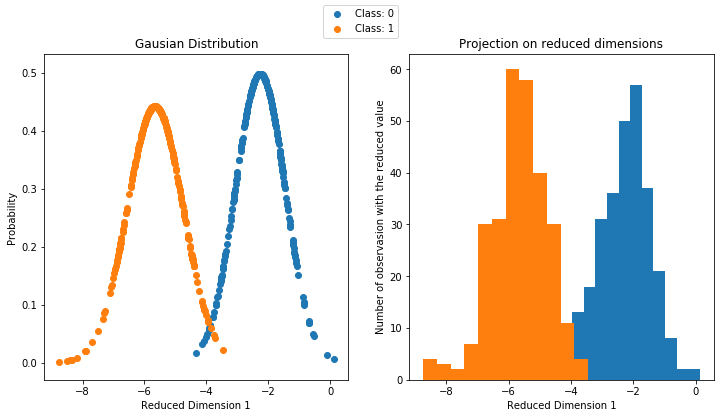

In [2]:
Data=np.loadtxt('Data1.txt')
train_data = Data[:,0:2]
train_lbls = Data[:,2]
classifier = FisherLD(train_data,train_lbls)

Now we will import the test data points as **_test_data_** and their labels as **_test_lbls_**.

We will use a method in the class called **_classify_** to get the model to classify our test data. We will name the labels that our model outputs simply _**t**_.

We will use the second method in this class _**project_on_reduced_dimensions**_ to do exactly that. We will pass **_test_data_** and the labels that our model predicted (`t`) in the method.
`classifier.project_on_reduced_dimensions(test_data, t)`

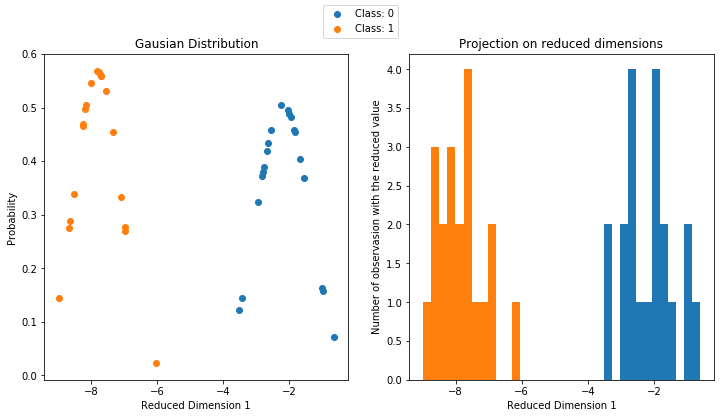

In [3]:
test_data = np.matrix(np.loadtxt('Test1.txt'))
test_lbls = classifier.classify(test_data)
t = classifier.classify(test_data)
f = classifier.project_on_reduced_dimensions(test_data, t)

Next, we can measure the accuracy of our predicted labels _**t**_ by matching them with the test labels that we imported **_test_lbls_**.

Accuracy comes out at **100%!**

In [4]:
Accuracy = 100*np.sum(t == test_lbls)/len(test_lbls)
print(f"Accuracy of predicted labels = {Accuracy}%")

Accuracy of predicted labels = 100.0%


## Testing the model on a three-class, four-feature dataset
For this we will use the Iris dataset. We will import four features from the dataset :
1. Sepal Length in cm
2. Sepal Width in cm
3. Petal Length in cm
4. Petal Width in cm

We will import our points points as **_X_** and their labels as **_t_**.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Download the data into a pandas Dataframe
df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )

#Picking out the desired features, and cleaning the data
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end
X = df[["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]]

#Formating the data labels into three classes of (1, 2, 3)
t = df["class label"]
enc = LabelEncoder()
label_encoder = enc.fit(t)
t = label_encoder.transform(t) + 1
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

Using Sci-Kit learn's method `train_test_split`, we will divide **_X_** and **_t_** into **_train_data_**, **_train_lbls_**. and **_test_data_**, **_test_lbls_**. We will use a 80% - 20% split.
We will then instantiate our class and make a classifier object called _**classifier**_, passing our training data and labels to the `__init__` method. This will train our classifier object. 
The class will identify that the data has three classes and will use different methods to accomodate this change.

Any number of classes and features can be modeled with this model, it was built for scalability. However, only datasets with two or three classes can be projected graphicaly. The model can still make label predictions on datasets with more classes.

Since this is a dataset with three classes, Fisher's algorithm will produce two reduced dimensions. we will represent the workings of our model graphically by drawing the _**Multivariate Guassian Distribution**_ in a 3D-space with our two reduced dimensions on the x-axis and y-axis and the probability of each point belonging to its class on the z-axis. This 3-D figure is rotated 45 degrees 3 times for clarity.
 
In addition, we are drawing a scatter plot of our two reduced dimensions with their correspoding projections in the form of a histogram. 

[[0.81170833 0.3241064  0.49562805 0.1093856 ]
 [0.3241064  0.36172359 0.20017805 0.11462278]
 [0.49562805 0.20017805 0.54396335 0.13102065]
 [0.1093856  0.11462278 0.13102065 0.13465207]]
[[0.19539076 0.45782305 0.14571367 0.54843763]
 [0.45782305 1.95088034 1.17689596 2.14274492]
 [0.14571367 1.17689596 0.90353659 1.22501055]
 [0.54843763 2.14274492 1.22501055 2.37710951]]


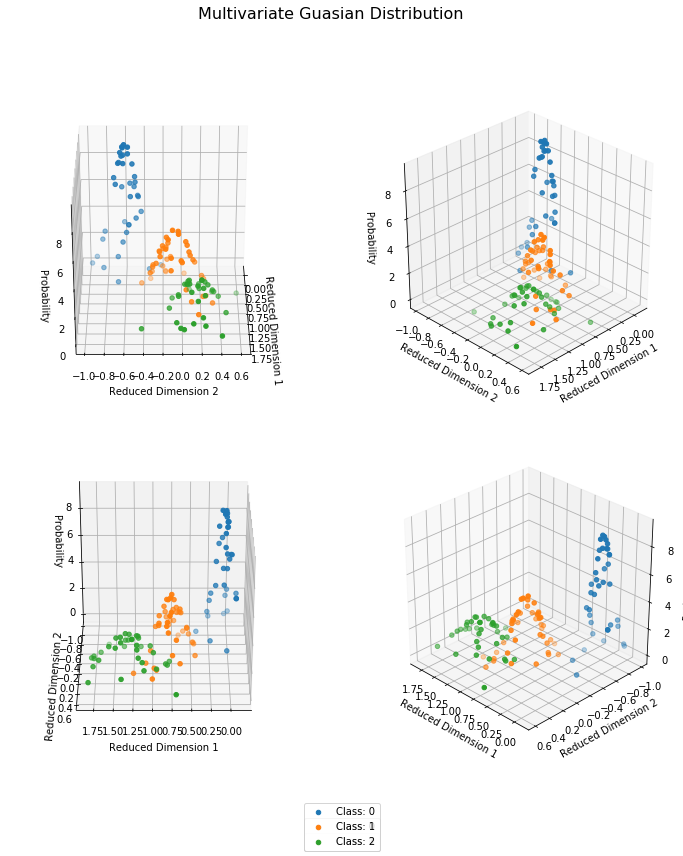

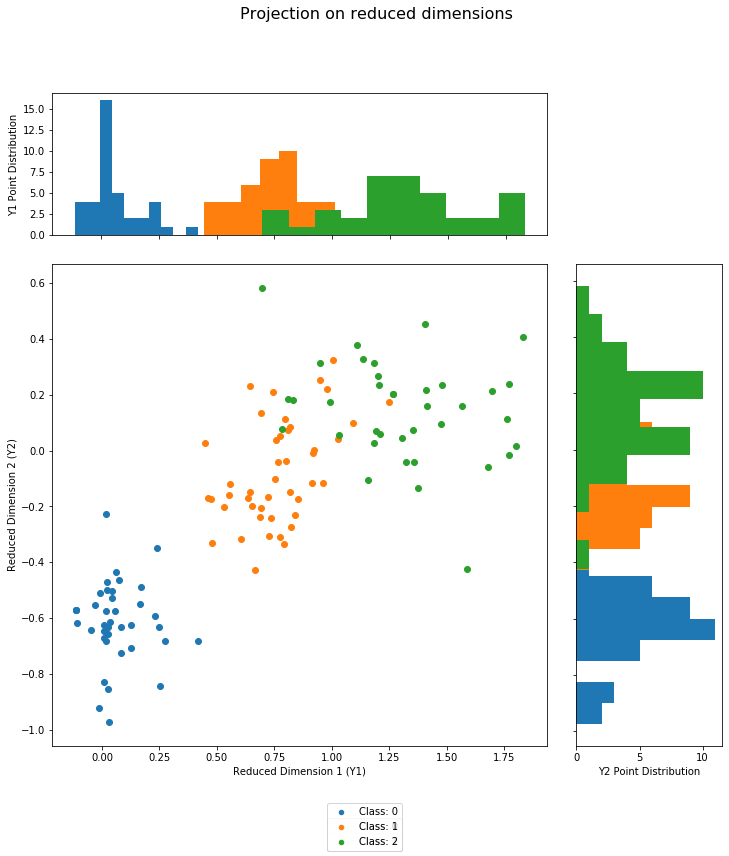

In [6]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_lbls, test_lbls = train_test_split(X, t, test_size = 0.2, random_state = 100)
classifier = FisherLD(train_data,train_lbls)

We will use **_classify_** again, to get the model to classify our test data. We will name the labels that our model outputs simply _**t**_.

e will use the second method in this class _**project_on_reduced_dimensions**_ to do exactly that. We will pass **_test_data_** and the labels that our model predicted (`t`) in the method.
`classifier.project_on_reduced_dimensions(test_data, t)`

The classifier will represent our points graphically in the same views that were produced when the model was being trained.

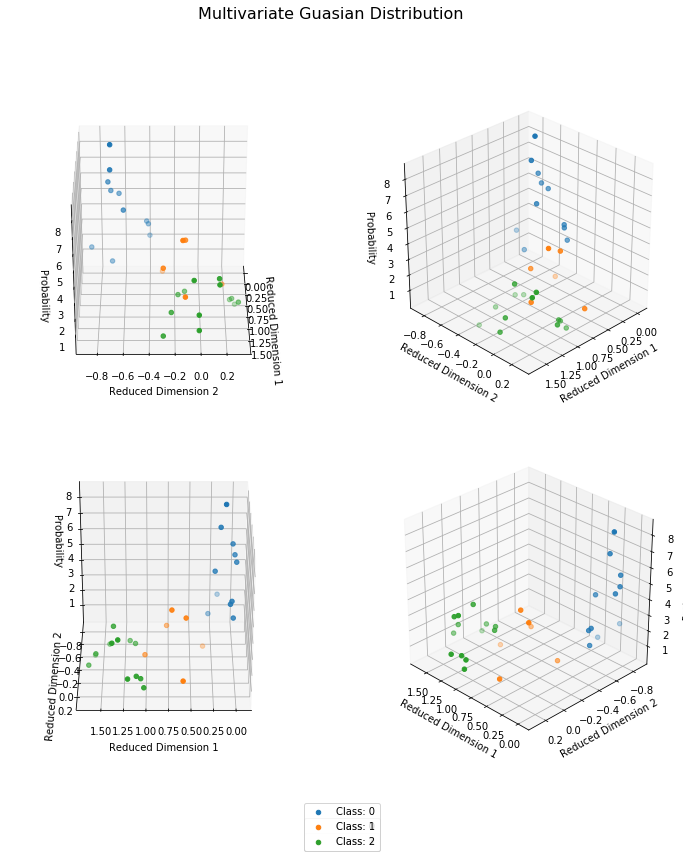

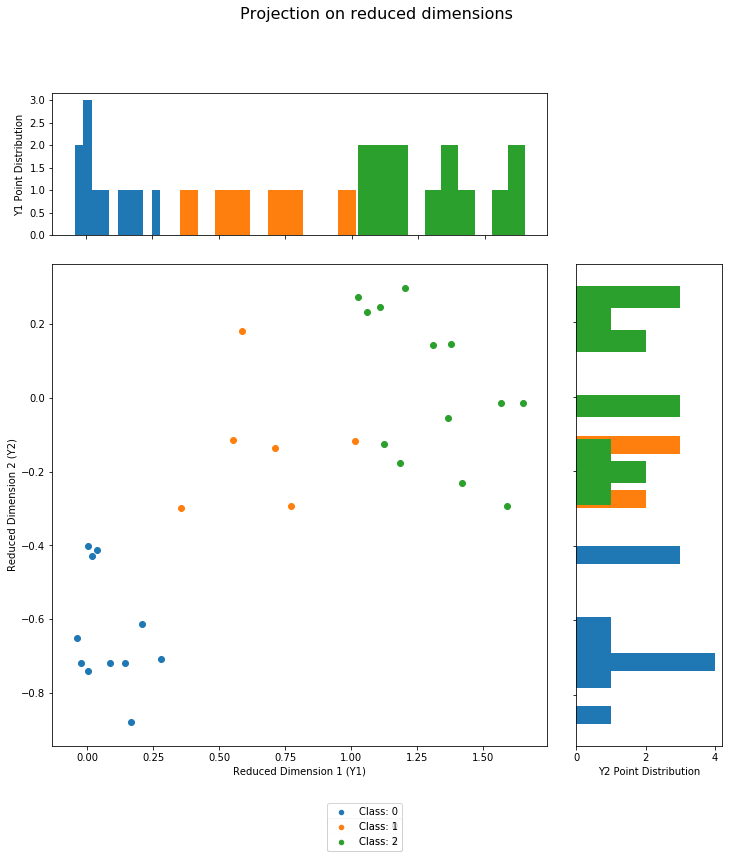

In [7]:
t = classifier.classify(test_data)

f = classifier.project_on_reduced_dimensions(test_data,t)

Next, we can measure the accuracy of our predicted labels _**t**_ by matching them with the test labels that we imported **_test_lbls_**.

Accuracy comes out at **100%!**

In [8]:
Accuracy = 100*np.sum(t == test_lbls)/len(test_lbls)
print(f"Accuracy of predicted labels = {Accuracy}%")

Accuracy of predicted labels = 100.0%
